In [2]:
from MovieBookAnalysis import *
%matplotlib inline

In [3]:
IMDB_ratings = pd.read_csv('datafiles/05_15_movie_books_IMDB_ratings.csv', index_col=0)

In [4]:
GR_ratings = pd.read_csv('datafiles/05_15_movie_books_GR_ratings.csv', index_col=0)

In [5]:
MC_ratings = pd.read_csv('datafiles/05_15_movie_books_MC_ratings.csv', index_col=0)

In [6]:
dummies = pd.get_dummies(IMDB_ratings.MPAArating)
IMDB_ratings = pd.concat([IMDB_ratings, dummies], axis=1)
IMDB_ratings = IMDB_ratings.rename(columns = {'PG-13':'PG13'})

In [8]:
IMDB_and_GR_ratings = IMDB_ratings.merge(GR_ratings, on='Title')
IMDB_and_GR_ratings.to_csv('datafiles/all_time_movie_books_IMDB_GR_ratings.csv')

## Compare IMDB user ratings against GR user ratings

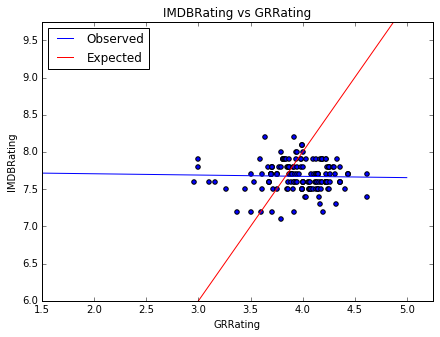

In [11]:
plotMovieRatingAgainstGR(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', ymin=6, ymax=10, xmin=1.5, xmax=5.25, ylim=9.75)

In [12]:
IMDB_GR_OLS = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating')

IMDBRating ~ GRRating


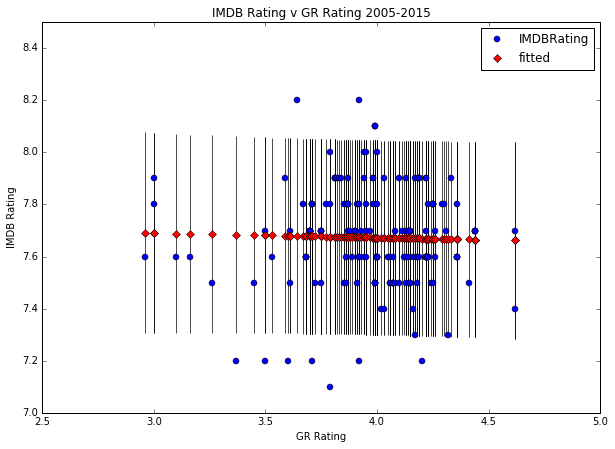

In [13]:
plotByResults(IMDB_GR_OLS, 'IMDB Rating v GR Rating 2005-2015', 'GR Rating', 'IMDB Rating')

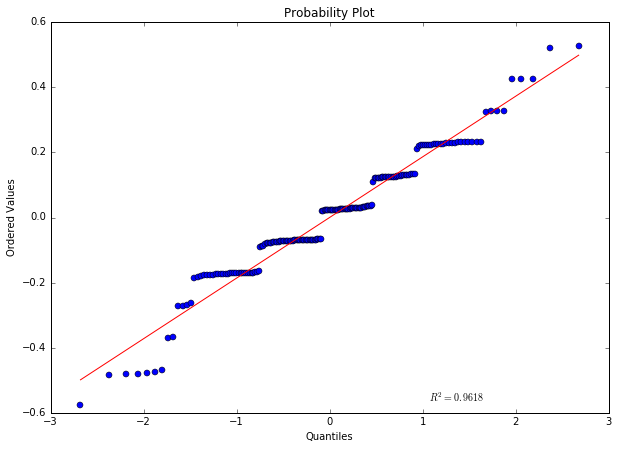

In [14]:
getQQPlot(IMDB_GR_OLS)

In [15]:
IMDB_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1264
Date:                Thu, 28 Jan 2016   Prob (F-statistic):              0.723
Time:                        15:37:49   Log-Likelihood:                 47.584
No. Observations:                 187   AIC:                            -91.17
Df Residuals:                     185   BIC:                            -84.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7422      0.194     39.814      0.000         7.359     8.126
GRRating      -0.0174      0.049     -0.356      0.723        -0.114     0.079
==============================================================================
Omnibus:                        4.647   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                5.444
Skew:                          -0.161   Prob(JB):                       0.0657
Kurtosis:                       3.771   Cond. No.                         59.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

['GRRating', 'const']
IMDBRating ~ GRRating
                            OLS Regression Results                            
Dep. Variable:             IMDBRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1766
Date:                Thu, 28 Jan 2016   Prob (F-statistic):              0.675
Time:                        15:37:49   Log-Likelihood:                 28.815
No. Observations:                 140   AIC:                            -53.63
Df Residuals:                     138   BIC:                            -47.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercep

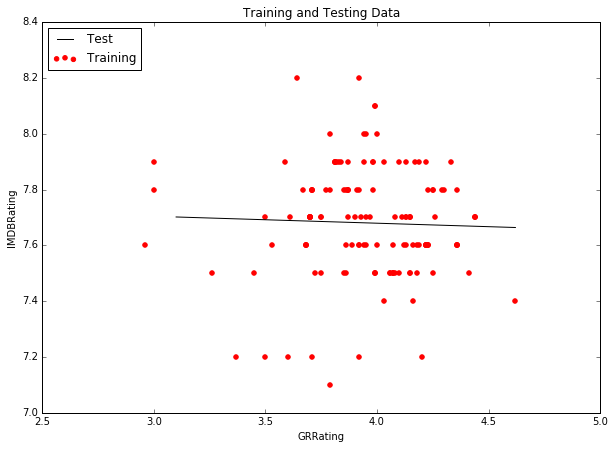

In [16]:
trainTestEvaluation(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating')

In [17]:
z_IMDB_GR_movies = getZscoreDiffofMovieAndBook(IMDB_ratings, GR_ratings, 'IMDBRating', 'GRRating', want='bettermovies')
    

/Users/kenn/Learning/ds/metis/projects/luther/ken_m/MovieBookAnalysis.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[(col+'_zscore')] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [18]:
#z_IMDB_GR_movies.head(10)

In [19]:
#z_IMDB_GR_books = getZscoreDiffofMovieAndBook(IMDB_ratings, GR_ratings, 'IMDBRating', 'GRRating', want='betterbooks')

In [20]:
#z_IMDB_GR_books.head(20)

## Compare MC user ratings against GR user ratings

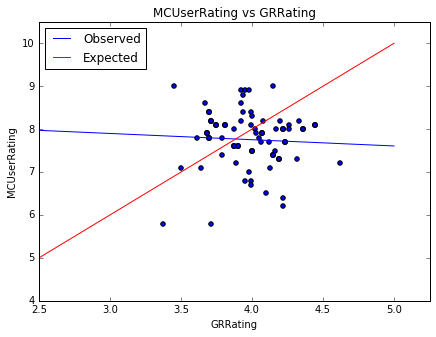

In [21]:
plotMovieRatingAgainstGR(MC_ratings, GR_ratings, 'MCUserRating', col2='GRRating', ymin=4, ymax=10, xmin=2.5, xmax=5.25, ylim=10.5)

In [22]:
MCuser_GR_OLS = getOLSResults(MC_ratings, GR_ratings, 'MCUserRating', col2='GRRating')

MCUserRating ~ GRRating


In [23]:
MCuser_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MCUserRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2643
Date:                Thu, 28 Jan 2016   Prob (F-statistic):              0.608
Time:                        15:37:50   Log-Likelihood:                -117.95
No. Observations:                 109   AIC:                             239.9
Df Residuals:                     107   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.3355      1.131      7.368      0.000         6.093    10.578
GRRating      -0.1457      0.283     -0.514      0.608        -0.707     0.416
==============================================================================
Omnibus:                       79.750   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.508
Skew:                          -2.344   Prob(JB):                    1.10e-135
Kurtosis:                      13.718   Cond. No.                         69.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## IMDB fit with other categories

['const', 'IMDBRatingCount']
IMDBRating ~ np.square(IMDBRatingCount) + IMDBRatingCount
                            OLS Regression Results                            
Dep. Variable:             IMDBRating   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     9.394
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           0.000147
Time:                        15:37:52   Log-Likelihood:                 46.346
No. Observations:                 146   AIC:                            -86.69
Df Residuals:                     143   BIC:                            -77.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------

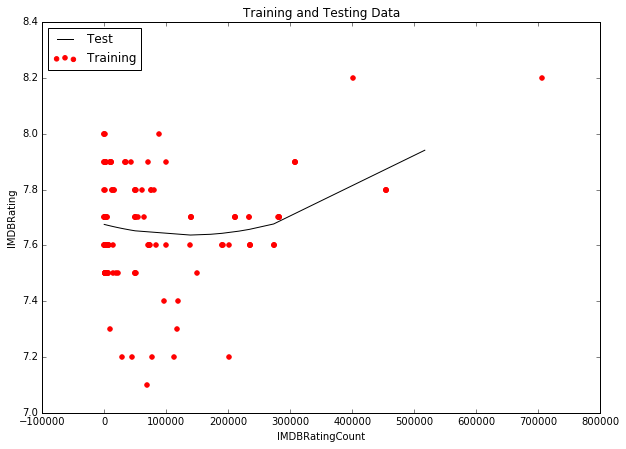

In [47]:
trainTestEvaluation(IMDB_ratings, GR_ratings, 'IMDBRating', col2='IMDBRatingCount', col3='IMDBRatingCount', transformDV='', transformIV1='square')


In [52]:
IMDBrating_10results = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='IMDBRatingCount', col3='Budget', col4='Runtime', transformIV1='')
IMDBrating_10results.summary()

IMDBRating ~ IMDBRatingCount + Budget + Runtime


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     19.85
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.17e-09
Time:                        23:32:36   Log-Likelihood:                 39.885
No. Observations:                  82   AIC:                            -71.77
Df Residuals:                      78   BIC:                            -62.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           7.3266      0.089     82.779      0.000         7.150     7.503
IMDBRatingCount  9.875e-07   1.39e-07      7.081      0.000       7.1e-07  1.27e-06
Budget          -1.656e-09   4.76e-10     -3.482      0.001      -2.6e-09 -7.09e-10
Runtime             0.0016      0.001      2.318      0.023         0.000     0.003
==============================================================================
Omnibus:                        7.435   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                9.005
Skew:                          -0.416   Prob(JB):                       0.0111
Kurtosis:                       4.395   Cond. No.                     3.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

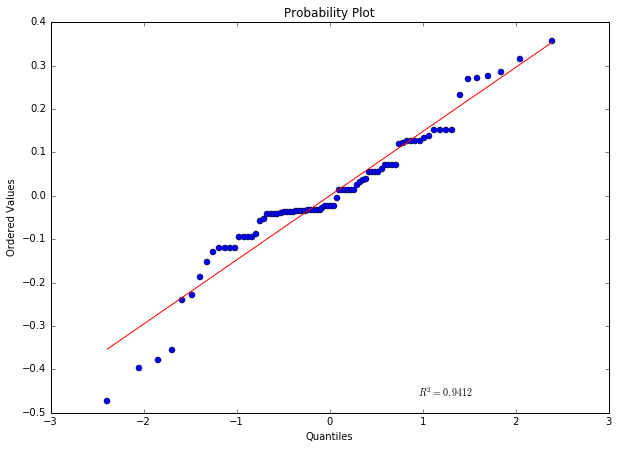

In [53]:
getQQPlot(IMDBrating_10results)